In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

In [59]:
np.random.seed(53)

In [60]:
shape_param = 2 # failures increasing with age
scale_param = 3000 # average failure time
n_engines = 50

In [61]:
failure_times = weibull_min.rvs(c=shape_param, scale=scale_param, size=n_engines)

In [62]:
df_failures = pd.DataFrame({'Engine_ID': range(1, n_engines + 1),
                            'Time_to_failure': failure_times.astype(int)})

print(df_failures.head())

   Engine_ID  Time_to_failure
0          1             4108
1          2             2722
2          3             2336
3          4             1976
4          5             2816


In [64]:
mtbf = df_failures['Time_to_failure'].mean()
print(f"(MTBF) equals: {mtbf:.2f} hours")

(MTBF) equals: 2558.46 hours


In [65]:
# Fitting the Weibull distribution to the data
fitted_shape, fitted_loc, fitted_scale = weibull_min.fit(df_failures['Time_to_failure'], floc=0)

print(f"Shape (β): {fitted_shape:.2f}")
print(f"Scale (η): {fitted_scale:.2f}")


Shape (β): 2.40
Scale (η): 2891.57


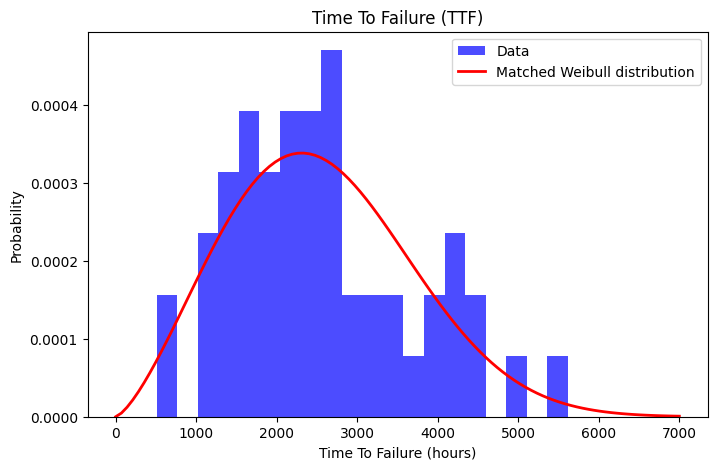

In [70]:
x = np.linspace(0, 7000, 100)
pdf = weibull_min.pdf(x, fitted_shape, fitted_loc, fitted_scale)

plt.figure(figsize=(8, 5))
plt.hist(df_failures['Time_to_failure'], bins=20, density=True, color='blue', alpha=0.7, label='Data')
plt.plot(x, pdf, 'r-', lw=2, label='Matched Weibull distribution')
plt.title('Time To Failure (TTF)')
plt.xlabel('Time To Failure (hours)')
plt.ylabel('Probability')
plt.legend()
plt.show()

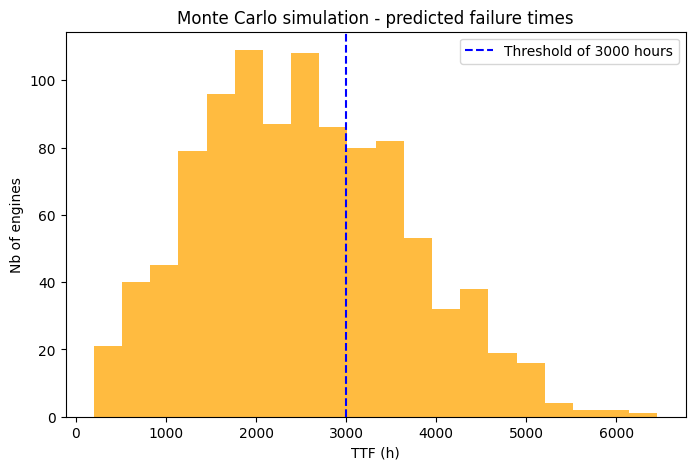

Percentage of engines, which fail before 3,000 hours: 66.8%


In [79]:
sim_n = 1000
simulated_failures = weibull_min.rvs(fitted_shape, scale=fitted_scale, size=sim_n)

plt.figure(figsize=(8, 5))
plt.hist(simulated_failures, bins=20, color='orange', alpha=0.75)
plt.axvline(x=3000, color='blue', linestyle='--', label='Threshold of 3000 hours')
plt.title('Monte Carlo simulation - predicted failure times')
plt.xlabel('TTF (h)')
plt.ylabel('Nb of engines')
plt.legend()
plt.show()

# How many engines will fail before 3,000 hours?
failed_before_3000 = (simulated_failures < 3000).sum()
print(f"Percentage of engines, which fail before 3,000 hours: {(failed_before_3000/sim_n)*100}%")

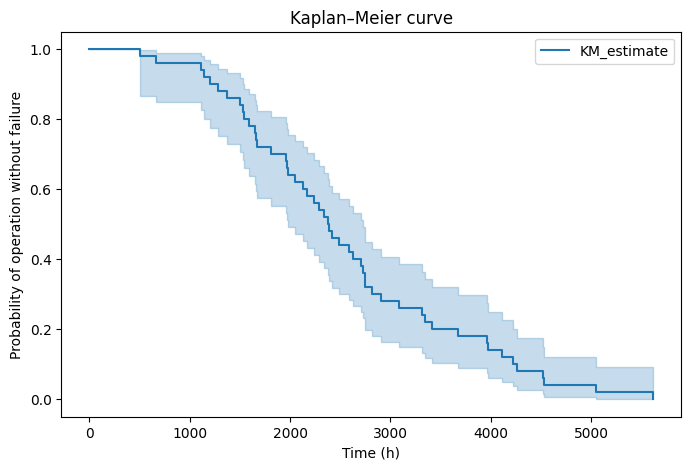

In [80]:
#!pip install lifelines
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

T = df_failures['Time_to_failure']
E = np.ones_like(T)  # 1 means that for all we have actual data (no censoring)

kmf.fit(T, event_observed=E)

plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title('Kaplan–Meier curve')
plt.xlabel('Time (h)')
plt.ylabel('Probability of operation without failure')
plt.show()


In [82]:
mttr = 50  # Mean Time To Repair

# MTBF
print(f"MTBF = {mtbf:.2f} hours")

# Availability calculation
availability = mtbf / (mtbf + mttr)

print(f"Availability: {availability*100:.2f}%")


MTBF = 2558.46 hours
Availability: 98.08%
